In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('spam.csv', encoding = "ISO-8859-1")

In [33]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5477,ham,What Today-sunday..sunday is holiday..so no wo...,NaN,NaN,NaN
3620,ham,That means from february to april i'll be gett...,NaN,NaN,NaN
4094,ham,I ain't answerin no phone at what is actually ...,NaN,NaN,NaN
3790,spam,"Twinks, bears, scallies, skins and jocks are c...",NaN,NaN,NaN
4126,ham,"Sorry, I'll call later",NaN,NaN,NaN


# 1. Data Cleaning

In [34]:
print(df.shape[0])
df.isna().sum()

5572


v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [36]:
# dropping last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)

In [37]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [38]:
# rename columns
df.columns = ['result', 'message']

In [39]:
df

,result,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [41]:
# label encode results and assign it to original dataframe
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['result'] = encoder.fit_transform(df['result'])
df
# ham got assigned as 0, spam got assigned as 1

,result,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [42]:
# check for null values
df.isnull().sum()

result     0
message    0
dtype: int64

In [44]:
# check for duplicated values
df.duplicated().sum()

403

In [45]:
df.drop_duplicates(keep='first', inplace=True)

In [46]:
df

,result,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# 2 Exploratory Data Analysis

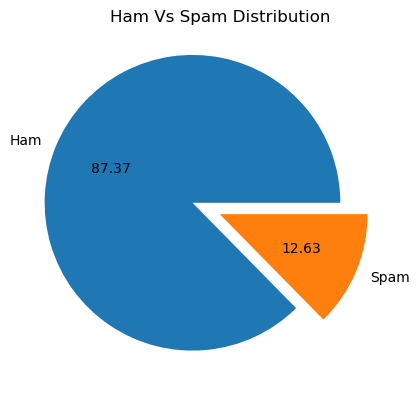

In [76]:
ham_vs_spam = df.groupby('result').count()['message']
plt.title('Ham Vs Spam Distribution')
plt.pie(ham_vs_spam, labels = ['Ham', 'Spam'], autopct='%.2f', explode=[0.2, 0])
plt.show()

data is imbalanced

In [77]:
!pip install nltk

In [82]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/parajoules/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [85]:
df['num_characters'] = df['message'].apply(len)

In [87]:
nltk.word_tokenize('Hello, k xa ta?')

['Hello', ',', 'k', 'xa', 'ta', '?']

In [90]:
df['num_words'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentences'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [91]:
df

,result,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [96]:
# ham messages
df[df['result'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [97]:
# spam messages
df[df['result'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


from data, it is evident that spam messages in general are longer

In [100]:
import seaborn as sns

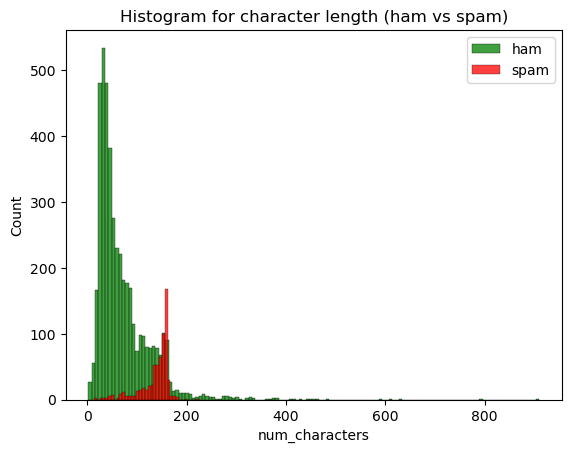

In [111]:
plt.title('Histogram for character length (ham vs spam)')
sns.histplot(df[df['result'] == 0]['num_characters'], color='green')
sns.histplot(df[df['result'] == 1]['num_characters'], color='red')
plt.legend(['ham', 'spam'])
plt.show()


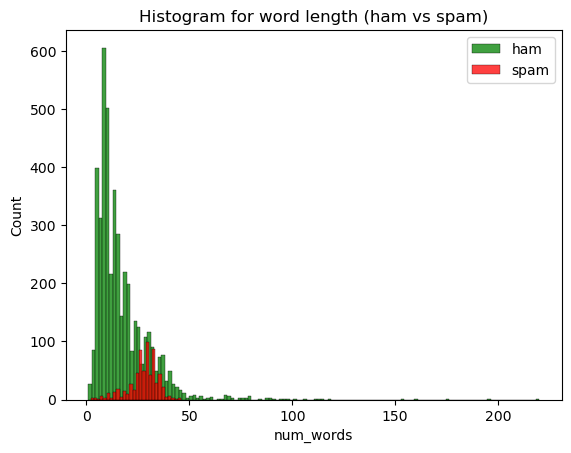

In [112]:
plt.title('Histogram for word length (ham vs spam)')
sns.histplot(df[df['result'] == 0]['num_words'], color='green')
sns.histplot(df[df['result'] == 1]['num_words'], color='red')
plt.legend(['ham', 'spam'])
plt.show()

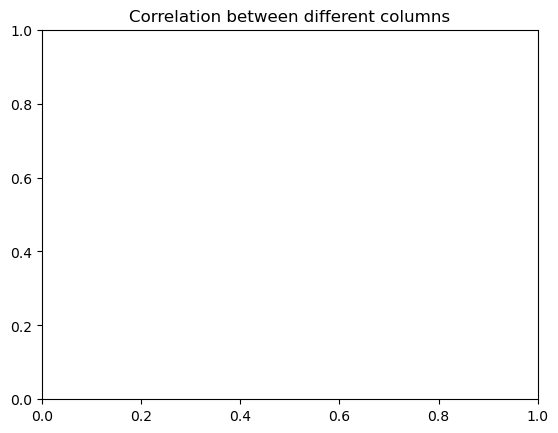

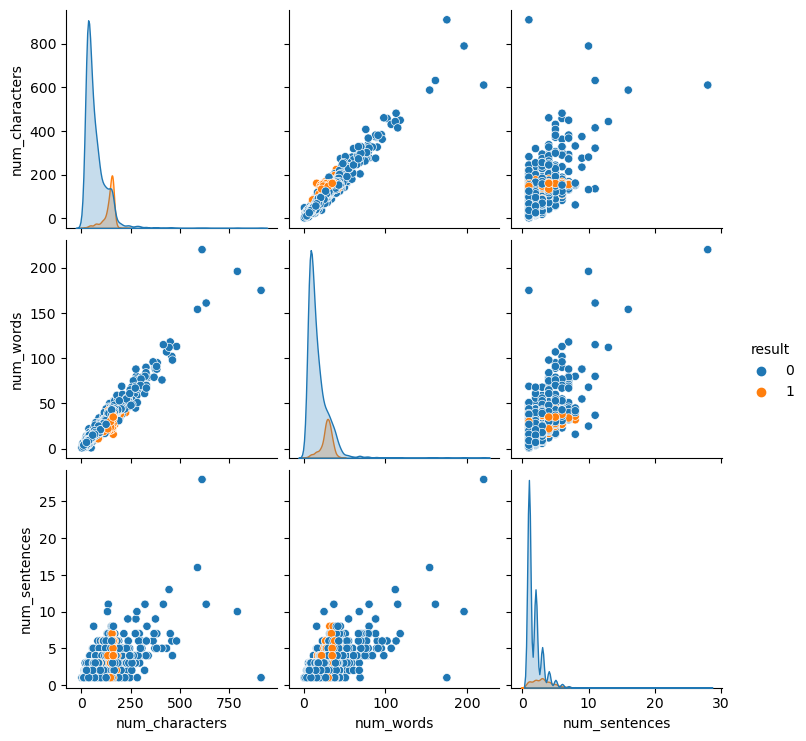

In [116]:
plt.title('Correlation between different columns')
sns.pairplot(df, hue='result')
plt.show()

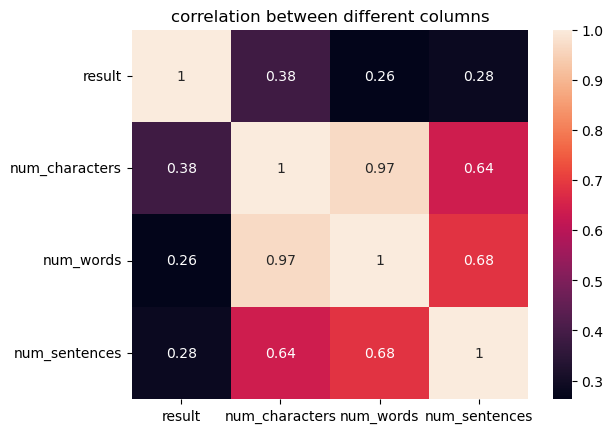

In [120]:
plt.title('correlation between different columns')
sns.heatmap(df.corr(), annot=True)
plt.show()

# 3 Text Preprocessing

In [176]:
import string

from nltk.corpus import stopwords
# nltk.download('stopwords')
stopwords.words('english')

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def screener(word):
    if word.isalnum():
        if word not in stopwords.words('english'):
            if word not in string.punctuation:
                return True
    return False

def transform_text(txt):
    txt = txt.lower()
    txt = nltk.word_tokenize(txt)
    txt = list(filter(screener, txt))
    txt = list(map(ps.stem, txt))
    return ' '.join(txt)

In [178]:
transform_text('Hello gaurav! You are a brilliant dancer. I love your dancing')

'hello gaurav brilliant dancer love danc'

In [180]:
df['message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [181]:
transform_text(df['message'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [182]:
df['transformed_message'] = df['message'].apply(transform_text_text)

In [183]:
df

,result,message,num_characters,num_words,num_sentences,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [185]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.4/460.4 kB 111.4 kB/s eta 0:00:000:00:010:00:01:01


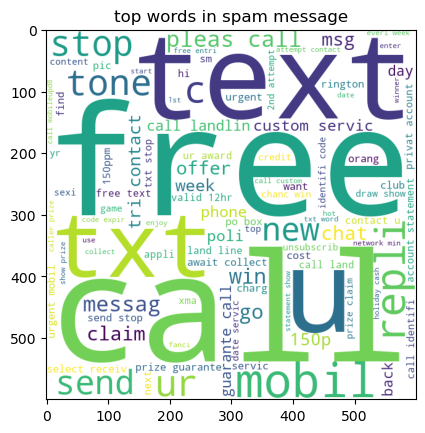

In [192]:
from wordcloud import WordCloud
wc = WordCloud(width=600, height=600, min_font_size=10, background_color='white')
spam_wc = wc.generate(df[df['result'] == 1]['transformed_message'].str.cat(sep=' '))
plt.title('top words in spam message')
plt.imshow(spam_wc)
plt.show()

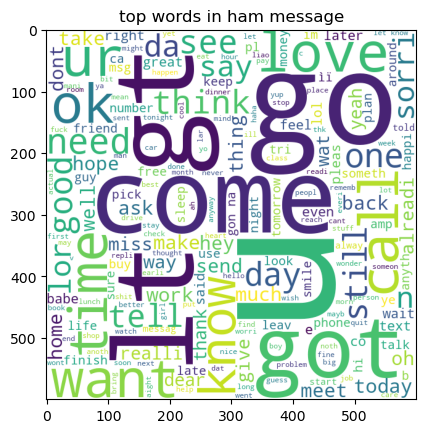

In [194]:
ham_wc = wc.generate(df[df['result'] == 0]['transformed_message'].str.cat(sep=' '))
plt.title('top words in ham message')
plt.imshow(ham_wc)
plt.show()

In [205]:
from collections import Counter

/home/parajoules/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


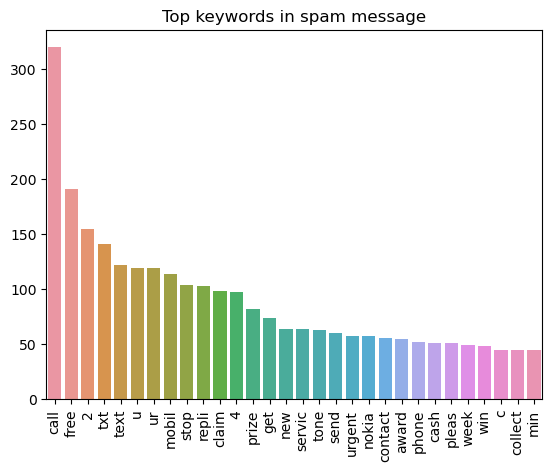

In [228]:
spam_corpus = []
for msg in list(df[df['result'] == 1]['transformed_message']):
    for word in msg.split(' '):
        spam_corpus.append(word)
spam_common_30_words = Counter(spam_corpus).most_common(30)

x = list(map(lambda x: x[0], spam_common_30_words))
y = list(map(lambda x: x[1], spam_common_30_words))

plt.title('Top keywords in spam message')
sns.barplot(x, y)
plt.xticks(rotation='vertical')
plt.show()

/home/parajoules/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


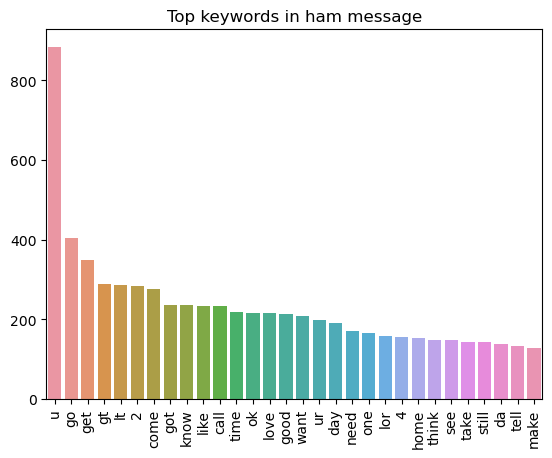

In [229]:
ham_corpus = []
for msg in list(df[df['result'] == 0]['transformed_message']):
    for word in msg.split(' '):
        ham_corpus.append(word)
ham_common_30_words = Counter(ham_corpus).most_common(30)

x = list(map(lambda x: x[0], ham_common_30_words))
y = list(map(lambda x: x[1], ham_common_30_words))

plt.title('Top keywords in ham message')
sns.barplot(x, y)
plt.xticks(rotation='vertical')
plt.show()

# 4 Model Building + Optimization(Hyper Parameter Tuning)

In [257]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_message']).toarray()

In [258]:
X.shape

(5169, 3000)

In [259]:
y = df['result'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [260]:
# split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [261]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()



In [262]:
gnb.fit(X_train, y_train)
mnb.fit(X_train, y_train)
bnb.fit(X_train, y_train)

y_pred_gnb = gnb.predict(X_test)
y_pred_mnb = mnb.predict(X_test)
y_pred_bnb = bnb.predict(X_test)

In [263]:
print('Gaussain NB*')
print('accuracy', accuracy_score(y_test, y_pred_gnb))
print('precision', precision_score(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))

Gaussain NB*
accuracy 0.8588007736943907
precision 0.47639484978540775
[[777 122]
 [ 24 111]]


In [264]:
print('Multinomial NB*')
print('accuracy', accuracy_score(y_test, y_pred_mnb))
print('precision', precision_score(y_test, y_pred_mnb))
print(confusion_matrix(y_test, y_pred_mnb))

Multinomial NB*
accuracy 0.9613152804642167
precision 1.0
[[899   0]
 [ 40  95]]


In [265]:
print('Bernoulli NB*')
print('accuracy', accuracy_score(y_test, y_pred_bnb))
print('precision', precision_score(y_test, y_pred_bnb))
print(confusion_matrix(y_test, y_pred_bnb))

Bernoulli NB*
accuracy 0.9700193423597679
precision 0.9905660377358491
[[898   1]
 [ 30 105]]


In [266]:
# tfidf(max_features=3000) with mnb

# 5 Export model

In [267]:
import pickle

In [268]:
with open('model.pkl', 'wb') as f:
    pickle.dump(mnb, f)

In [269]:
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

In [270]:
import string

from nltk.corpus import stopwords
# nltk.download('stopwords')
stopwords.words('english')

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def screener(word):
    if word.isalnum():
        if word not in stopwords.words('english'):
            if word not in string.punctuation:
                return True
    return False

def transform_text(txt):
    txt = txt.lower()
    txt = nltk.word_tokenize(txt)
    txt = list(filter(screener, txt))
    txt = list(map(ps.stem, txt))
    return ' '.join(txt)